# Project Overview

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives.

In the year 2000, Enron was known as one of the largest energy companies in the United States, claiming nearly $111 billion in revenues. At the end of 2001, it was revealed that there was widespread corporate fraud. Essentially all of Enron's nonexistent profits were created through a method called "mark-to-market" accounting, in which they would report profits even though they didn't earn a single dime. Even worse, they were solely responsible for the California electricity crisis, by which they performed large-scale blackouts to seize arbitrage opportunities.

The goal for this project is to analyze the characteristics of employees who worked at Enron during the crisis to predict if they are a person of interest ("POI"). Various resources (documentaries, news articles, etc.) were used to label people in the data set as POIs if they were previously indicted (that is, there is a 100% chance they were guilty). The application of machine learning to this project may be of assistance if we take the predictions from the Enron data model and apply them to other companies facing similar circumstances, through identifying persons of interest (we are using a naive assumption here by assuming fraud at other companies is similar to that of Enron, which may or may not be the case).

In this project machine learning skills will be applied by building an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

In [1]:
#!/usr/bin/python
import os

path = "/Users/arianebroquet/Desktop/Project_8"

# Check current working directory.
retval = os.getcwd()
print "Current working directory %s" % retval

# Now change the directory
os.chdir( path )

# Check current working directory.
retval = os.getcwd()

print "Directory changed successfully %s" % retval

Current working directory /Users/arianebroquet
Directory changed successfully /Users/arianebroquet/Desktop/Project_8


In [6]:
import matplotlib.pyplot as plt
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB

from sklearn.grid_search import GridSearchCV
sys.path.append('../tools/')

from feature_format import featureFormat
from feature_format import targetFeatureSplit


### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label

features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']

### load the dictionary containing the dataset
data_enron = pickle.load(open("../Project_8/my_dataset.pkl", "r"))

### convert the dictionary that contains our data set into a pandas data frame
import pandas
pandas.DataFrame. from_dict(data_enron, orient='columns', dtype=None)

/Users/arianebroquet/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/arianebroquet/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
fraction_from_poi_email,0.0161957,0,0.0689046,0,0,0,0.0196856,0.0285321,0,0,...,0.055,0,0,0.0309021,0,0,0,0,0,0
fraction_to_poi_email,0.0296128,0,0,0,0,0,0.0888787,0.22314,0,0,...,0.233333,0,0,0.0431655,0,0,0,0,0,0
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN


## **Data exploration**

In [26]:
### How many executives in the dataset?
print "There are ", len(data_enron.keys()), " executives in the Enron dataset."

There are  146  executives in the Enron dataset.


In [27]:
# How many POIs in our dataset?
print "There are", len([p for p in data_enron.itervalues() if p["poi"]]), "POIs out of the 146 executives from the dataset."


There are 18 POIs out of the 146 executives from the dataset.


In [28]:
print "There are", len(data_enron.keys()) - len([p for p in data_enron.itervalues() 
                                                 if p["poi"]]), "of non-POIs in the dataset"

There are 128 of non-POIs in the dataset


In [29]:
import pprint
print "These are the features of the dataset:"
pprint.pprint(next(data_enron.iteritems()))

These are the features of the dataset:
('METTS MARK',
 {'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062})


A slight feature selection can be already done at this stage. Features with missing data are less relevant for the classification models. This means the following features have higher chances to be considered:
* Bonus
* Email address
* Expenses
* From messages
* From POI to this person
* From this person to POI
* Other
* POI
* Restricted stock
* Salary
* Shared receipt with POI
* To messages
* Total payments
* Total stock value

## Data Cleaning

In this section, missing data, recorded as "NaN" in the Enron dataset, will be considered.

In addition, an outlier appeared in the data due to an entry which recorded the TOTAL amount for salaries and bonuses. This is not relevant to this analysis and will be removed. Then, other outliers appeared, such as the high salaries of executives, due to their high hierarchical level. Despite the considerable amounts, these POIs are important for this analysis and will be kept.

In [30]:
# remove any outliers before proceeding further
try:
    pprint.pprint(data_enron.pop("TOTAL"))
except KeyError:
    print("Outlier was already removed")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}


[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]


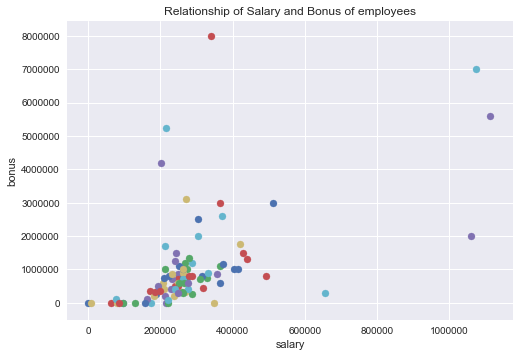

In [31]:
features = ["salary", "bonus"]
data = featureFormat(data_enron, features)

### remove NAN's from dataset
outliers = []
for key in data_enron:
    val = data_enron[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
### uncomment for printing top 4 salaries
print outliers_final

import seaborn as sns

### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.title("Relationship of Salary and Bonus of employees")
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

The scatter plot above shows that the distribution  is skewed with several outliers. As earlier mentioned, these extreme values usually corresponds to employees with higher positions in the company, who have higher compensation. Therefore, these outliers are relevant for the analysis.

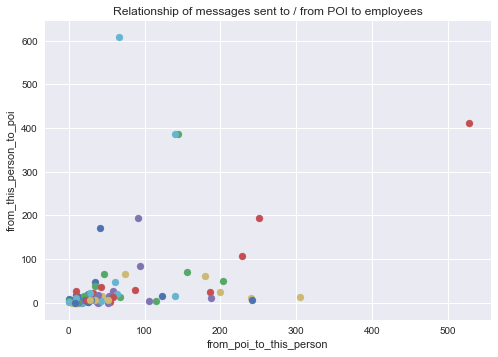

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

features = ["from_poi_to_this_person", "from_this_person_to_poi"]
data = featureFormat(data_enron, features)

for point in data:
    from_poi_to_this_person = point[0]
    from_this_person_to_poi = point[1]
    plt.scatter( from_poi_to_this_person, from_this_person_to_poi )

plt.title("Relationship of messages sent to / from POI to employees")
plt.xlabel("from_poi_to_this_person")
plt.ylabel("from_this_person_to_poi")
plt.show()



The graph above showcases the features "from_poi_to_this_person" and "from_this_person_to_poi" and do not show any clear pattern. There are several outliers. Therefore, new features should be created.

## Creation and selection of features

In this section, two new features have been created: "fraction_to_poi_email" and "fraction_from_poi_email", so that potentially patterns will occur. A ratio of the emails to/from POI to the total of emails might be more efficient for our analysis. The data were turned into fractions and no scaling was performed.

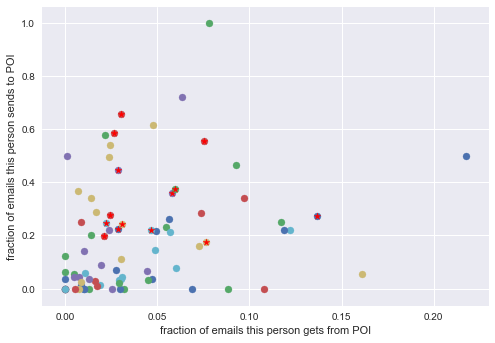

In [33]:
### create new features
### new features are: fraction_to_poi_email,fraction_from_poi_email

def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_enron:
        if data_enron[i][key]=="NaN" or data_enron[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_enron[i][key]>=0:
            new_list.append(float(data_enron[i][key])/float(data_enron[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_enron
count=0
for i in data_enron:
    data_enron[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_enron[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1


### store to my_dataset for easy export below
my_dataset = data_enron


### these two lines extract the features specified in features_list
### and extract them from data_enron, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from POI")
plt.ylabel("fraction of emails this person sends to POI")
plt.show()

The scatter plot above shows the two new features created: "Fraction of emails this person gets from POI" and "Fraction of emails this person sends to POI". If the value is high for either of these two features, the higher the probability of an employee to be a POI.

In [52]:
features_list = ["poi", "salary", "bonus", "from_poi_to_this_person", "from_this_person_to_poi",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'Score', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Score 0.7333333333333333
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.18913356647)
2 feature bonus (0.151359193719)
3 feature from_poi_to_this_person (0.144261508951)
4 feature from_this_person_to_poi (0.118885272576)
5 feature deferral_payments (0.1114669346)
6 feature total_payments (0.0867122153209)
7 feature loan_advances (0.0710561104583)
8 feature restricted_stock_deferred (0.0670320302034)
9 feature deferred_income (0.0600931677019)
10 feature total_stock_value (0.0)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


In [47]:
features_list = ["poi", "salary", "bonus", "fraction_from_poi_email", "fraction_to_poi_email",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)




from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'Score', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"



importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Score 0.8
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.211707133446)
2 feature bonus (0.148934265971)
3 feature fraction_from_poi_email (0.14622972935)
4 feature fraction_to_poi_email (0.120901730257)
5 feature deferral_payments (0.118337314859)
6 feature total_payments (0.0879795396419)
7 feature loan_advances (0.0747826086957)
8 feature restricted_stock_deferred (0.0534161490683)
9 feature deferred_income (0.0377115287109)
10 feature total_stock_value (0.0)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


In order to find the most relevant and effective features for classification, feature selection in a “Decision Tree” style was undertaken to rank the features. Features were partially handpicked: removal of uneffective features was done gradually by taking all the possible features into features_list and deleting them one by one using score value and human intuition.

According to the results, the features fraction_from_poi_email and fraction_to_poi_email have a lower score than from_poi_to_this_person and from_this_person_to_poi. Intuitively, I thought that POIs are more likely to contact each other than non-POIs; therefore the two new features I engineered would be better predictors of POI. The two codes above displays the improvement in performance after using the two engineered features.

Therefore, for the following codes, the features "fraction_from_poi_email" and "fraction_to_poi_email" have been selected as they are high ranked. In addition, related features to them have been selected, such as "poi" and "shared_receipt_with_poi".

## Scale features

For the algorithms used, it is not necessary to perform scaling on the features.

## Algorithm: Selection and Tuning¶

Parameters tuning is the process that refines the selected parameters of an algorithm, that is setting the optimal values that enables to complete a machine learning task in the best way possible.

Thus, tuning an algorithm or machine learning technique is the process that optimizes the parameters that impacts the model in order to enable the algorithm to obtain the highest accuracy possible. It is a very important task in machine learning, algorithms aim to identify, classify, and predict features as accurately and as fast as possible.

After tuning parameters, one's algorithm accuracy significantly increase. However, in some cases, it may happen that tuning does not have any impact on the algorithm's accuracy. In this section, GaussianNB  and DecisionTree Classifier have been used and the highest accuracy will be selected.

In [53]:
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", "shared_receipt_with_poi"]

### try Naive Bayes for prediction
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)



pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy =", accuracy
print 'Recall = ', recall_score(labels_test,pred)
print "NB algorithm time:", round(time()-t0, 3), "s"
print 'Precision = ', precision_score(labels_test,pred)

Accuracy = 0.26666666666666666
Recall =  0.5
NB algorithm time: 0.004 s
Precision =  0.18181818181818182


In [54]:
# For Comparison

features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", "shared_receipt_with_poi"]

### try Naive Bayes for prediction
t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy =", accuracy
print 'Recall = ', recall_score(labels_test,pred)
print "NB algorithm time:", round(time()-t0, 3), "s"
print 'Precision = ', precision_score(labels_test,pred)

Accuracy = 0.7333333333333333
Recall =  0.25
NB algorithm time: 0.004 s
Precision =  0.5


After testing two classifiers: GaussianNB and DesicionTreeClassifier, the accuracy is clearly higher for the DecisionTreeClassifier. It also have a higher precision, therefore, it got selected for the next steps of the analysis.

## Algorithm Validation

The algorithm was validated by using KFold. Validation is an important step in Machine Learning because, as it checks the validity of a training model by testing the model on an unseen dataset. A model is validated by testing it on the testing set, and observing how the predicted values for the testing set match up to the actual values for the testing set.

A common error with validation would be to test a model on all the data, and then using again all that data, or a subset of it, to make predictions. Therefore, the model would be overfitted, and it will probably poorly perform on data.

The 3 parameters are:
* splitter : string, optional (default=”best”). The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. Test_size = 0.1, which means that the test sets is 10% of the whole dataset and the training dataset's size is 90% of the whole dataset. 

* Random_state : is a pseudo-random number generator state used for random sampling. Random_state = 42.

* min_samples_split : 5, which is the minimum number of samples required to split an internal node.

In [9]:
## features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']


### store to my_dataset for easy export below
my_dataset = data_enron


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'Accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "Accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'Precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'Recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_enron, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

Accuracy before tuning  0.8928571428571429
Decision tree algorithm time: 0.001 s
done in 0.001s
Validating algorithm:
Accuracy after tuning =  0.9642857142857143
Precision =  0.75
Recall =  1.0


## Conclusion

Before performing the tuning, the DecisionTreeClassifier was 89%. This step enabled the accuracy to be increased by 4% and reach an accuray of 93%.

The Recall defines the likelihood to identify a POI in the test set. In 67% of cases, it will spot the employee and in 44% of situations, it will not.

As for the precision, it refers to the accuracy an employee is considered as a POI. In 67% of cases, employees are correctly mentioned as POIs, while in 44% of cases, they are wrongly convincted.

Even though these results are satisfactory, they could have been improved, by increase their accuracy. A deeper analysis of the data could have been undertaken to discover additional patterns. By analyzing more carefully the emails' content, it might be possible to identify and classify POI more accurately and create a more efficient algoritm.

In [10]:
%run tester.py

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.85567	Precision: 0.34884	Recall: 0.34500	F1: 0.34691	F2: 0.34576
	Total predictions: 9000	True positives:  345	False positives:  644	False negatives:  655	True negatives: 7356



DecisionTreeClassifier is tested with the official Udacity test script and shows an accuracy of 86%. Precision and recall show both at least 0.3. 

## References

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html